# E6.A - Task

In [39]:
reset -f

In [40]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [41]:
L, F, x, E, Iz, lam  = sp.symbols('L, F, x, E, I_z, lambda', real = 'True', positive = 'True')
Ay, Bx, By = sp.symbols('A_y, B_x, B_y', real = 'True')
vL2  = sp.symbols('v_{L2}', real = 'True')
Mbz1 = sp.Function('M_{bz1}')
Mbz2 = sp.Function('M_{bz2}')
v1 = sp.Function('v_1')
v2 = sp.Function('v_2')

# Support reactions

In [42]:
eqx = sp.Eq(0, Bx + F)
eqy = sp.Eq(0, Ay + By) 
eqz = sp.Eq(0, By*L - F*vL2)

sol = sp.solve([eqx, eqy, eqz], [Ay, Bx, By])
Bx, Ay, By = sol.values()
display(Bx, Ay, By)

-F

-F*v_{L2}/L

F*v_{L2}/L

## Internal forces

In [43]:
eq1 = sp.Eq(0, Mbz1(x) - Ay*x)
eq2 = sp.Eq(0, Mbz2(x) - Ay*x - F*(vL2 - v2(x)))

In [44]:
sol = sp.solve((eq1, eq2), (Mbz1(x), Mbz2(x)))
Mbz1, Mbz2 = sol.values()
display(Mbz1)
display(Mbz2)

-F*v_{L2}*x/L

F*v_{L2} - F*v_2(x) - F*v_{L2}*x/L

In [48]:
DefEq1 = sp.Eq(sp.Derivative(v1(x),x,x), Mbz1/(E*Iz)) 
DefEq2 = sp.Eq(sp.Derivative(v2(x),x,x), Mbz2/(E*Iz)) 

# DefEq1 = sp.Eq(sp.Derivative(v1(x),x,x), DefEq1.rhs.factor().subs(F/(E*Iz), lam**2))
# DefEq2 = sp.Eq(sp.Derivative(v2(x),x,x), DefEq2.rhs.factor().subs(F/(E*Iz), lam**2))
display(DefEq1)
display(DefEq2)

Eq(Derivative(v_1(x), (x, 2)), -F*v_{L2}*x/(E*I_z*L))

Eq(Derivative(v_2(x), (x, 2)), (F*v_{L2} - F*v_2(x) - F*v_{L2}*x/L)/(E*I_z))

classifying the equation:
* ordinary 
* linear
* second orden
* inhomogeneous
* constant coefficients

we need an ODE solver-> sp.dsolve()

In [32]:
sol1 = sp.dsolve(DefEq1)
sol2 = sp.dsolve(DefEq2)
v1 = sol1.rhs
dv1dx = sp.diff(v1, x)
v2 = sol2.rhs.subs([('C1', 'C3'), ('C2', 'C4')])
dv2dx = sp.diff(v2, x)
display(v1)
display(dv1dx)
display(v2)
display(dv2dx)

C1 + C2*x - F*v_{L2}*x**3/(6*E*I_z*L)

C2 - F*v_{L2}*x**2/(2*E*I_z*L)

C3*sin(sqrt(F)*x/(sqrt(E)*sqrt(I_z))) + C4*cos(sqrt(F)*x/(sqrt(E)*sqrt(I_z))) + v_{L2} - v_{L2}*x/L

C3*sqrt(F)*cos(sqrt(F)*x/(sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)) - C4*sqrt(F)*sin(sqrt(F)*x/(sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)) - v_{L2}/L

In [33]:
BC1 = sp.Eq(0, v1.subs(x,0))
BC2 = sp.Eq(0, v1.subs(x, L/2) - v2.subs(x, L/2))
BC3 = sp.Eq(0, dv1dx.subs(x, L/2) - dv2dx.subs(x, L/2))
BC4 = sp.Eq(0, vL2 - v2.subs(x,L/2))
BC5 = sp.Eq(0, v2.subs(x, L))
display(BC1)
display(BC2)
display(BC3)
display(BC4)
display(BC5)

Eq(0, C1)

Eq(0, C1 + C2*L/2 - C3*sin(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))) - C4*cos(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))) - v_{L2}/2 - F*L**2*v_{L2}/(48*E*I_z))

Eq(0, C2 - C3*sqrt(F)*cos(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)) + C4*sqrt(F)*sin(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)) + v_{L2}/L - F*L*v_{L2}/(8*E*I_z))

Eq(0, -C3*sin(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))) - C4*cos(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))) + v_{L2}/2)

Eq(0, C3*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) + C4*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))))

In [34]:
CoeffMat = sp.Matrix([[BC1.rhs.coeff('C1'), BC1.rhs.coeff('C2'), BC1.rhs.coeff('C3'), BC1.rhs.coeff('C4'), BC1.rhs.coeff(vL2)],
                      [BC2.rhs.coeff('C1'), BC2.rhs.coeff('C2'), BC2.rhs.coeff('C3'), BC2.rhs.coeff('C4'), BC2.rhs.coeff(vL2)],
                      [BC3.rhs.coeff('C1'), BC3.rhs.coeff('C2'), BC3.rhs.coeff('C3'), BC3.rhs.coeff('C4'), BC3.rhs.coeff(vL2)],
                      [BC4.rhs.coeff('C1'), BC4.rhs.coeff('C2'), BC4.rhs.coeff('C3'), BC4.rhs.coeff('C4'), BC4.rhs.coeff(vL2)],
                      [BC5.rhs.coeff('C1'), BC5.rhs.coeff('C2'), BC5.rhs.coeff('C3'), BC5.rhs.coeff('C4'), BC5.rhs.coeff(vL2)]])
CoeffMat

Matrix([
[1,   0,                                                                 0,                                                                0,                        0],
[1, L/2,                             -sin(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))),                            -cos(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))), -1/2 - F*L**2/(48*E*I_z)],
[0,   1, -sqrt(F)*cos(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)), sqrt(F)*sin(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z)))/(sqrt(E)*sqrt(I_z)),      1/L - F*L/(8*E*I_z)],
[0,   0,                             -sin(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))),                            -cos(sqrt(F)*L/(2*sqrt(E)*sqrt(I_z))),                      1/2],
[0,   0,                                sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))),                               cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))),                        0]])

In [37]:
EvEq = sp.Eq(0, CoeffMat.det())
EvEq.rhs.as_real_imag()[0].simplify()

(864*E**(5/2)*sqrt(F)*I_z**(5/2)*L*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))**2 - 768*E**(5/2)*sqrt(F)*I_z**(5/2)*L*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) + 552*E**(5/2)*sqrt(F)*I_z**(5/2)*L*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) - 216*E**(5/2)*sqrt(F)*I_z**(5/2)*L*sin(3*sqrt(F)*L/(sqrt(E)*sqrt(I_z))) - 96*E**(3/2)*F**(3/2)*I_z**(3/2)*L**3*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))**2 + 24*E**(3/2)*F**(3/2)*I_z**(3/2)*L**3*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) + 24*E**(3/2)*F**(3/2)*I_z**(3/2)*L**3*sin(3*sqrt(F)*L/(sqrt(E)*sqrt(I_z))) - 2*sqrt(E)*F**(5/2)*sqrt(I_z)*L**5*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) - 2*sqrt(E)*F**(5/2)*sqrt(I_z)*L**5*sin(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) - 576*E**3*I_z**3*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z)))**2 + 1152*E**3*I_z**3*cos(sqrt(F)*L/(sqrt(E)*sqrt(I_z))) - 576*E**3*I_z**3 - 16*E**2*F*I_z**2*L**2*cos(sqrt(F)*L/(s

In [247]:
fun = EvEq.rhs.as_real_imag()[0]
fun = fun.subs([(E, 210000), (Iz,  sp.pi/64 * 1**4), (L, 100)])

fun = sp.lambdify(F, fun, 'numpy')
# fun = sp.lambdify(lam, fun, 'numpy')

In [254]:
f_vec = np.linspace(0.0001,100,1000)

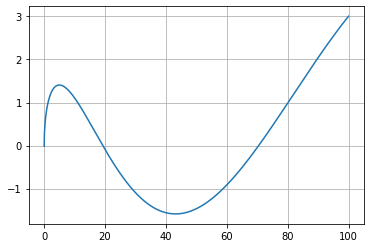

In [255]:
plt.plot(f_vec,fun(f_vec))
plt.grid()

In [256]:
from scipy.optimize import fsolve

In [257]:
sol = fsolve(lambda F: fun(F),20)
sol

array([19.2414291])

In [235]:
#sol = fsolve(lambda lam: fun(lam),0.05)
#sp.solve(sp.Eq(sol[0]**2, F/(E*Iz)), F)[0].subs([(E, 210000), (Iz,  sp.pi/64 * 1**4), (L, 100)]).evalf()

19.2414291048678

In [228]:
(18.7 * 210000 * sp.pi/64*1**4 / 100**2).evalf()

19.2766161728861

0